In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
# commong discharge drive
nsamp = 50000
fsamp=5000
sigamp=1
fdrive=71
offsetPhase=0
tarr = np.arange(0, nsamp/fsamp, 1.0/fsamp)
sigIn = sigamp * np.sin(2.0 * np.pi * fdrive * tarr+offsetPhase)

## Compare scale for Zernike using two methods

In [3]:
# load files for Zernike

stepCalDirZern = r'/data/new_trap/20210622/bead1/Discharge/FineDischarge/'
stepCalFilesZern = load_dir(stepCalDirZern, start_file=300)

100%|██████████| 280/280 [00:07<00:00, 40.27it/s]

580  files in folder
280  files loaded


In [4]:
# calculate inPhase component and get the scaling

corrsZern = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in stepCalFilesZern]
inPhaseZern = [cc[0] for cc in corrsZern]


In [5]:
# calculate digital demodulation

digiDemodZern =  [digital_demod(dat=files.x2,fDemod=71).imag for files in stepCalFilesZern]

In [6]:
# extract the applied voltage method #1

dischargeVoltageZern = np.std(stepCalFilesZern[-1].electrode_data[0])*np.sqrt(2)+np.std(stepCalFilesZern[-1].electrode_data[1])*np.sqrt(2) 
dischargeAmpsZern = inPhaseZern
# select (manually) the charge and the respective files
charge=1 
scaleXZern = np.abs(np.mean(dischargeAmpsZern[180:200]))/charge # scales bits to charges
scaleYZern = scaleXZern*-1.0502 # from discharge values in x and y

eta=0.6 # get from COMSOL 
scaleForceXZern= np.abs(np.mean(dischargeAmpsZern[180:200]))/(dischargeVoltageZern*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleXZern)
print("voltage: ", dischargeVoltageZern)
print(scaleXZern)

# extract the applied voltage method #2

dischargeAmpsZern = digiDemodZern
# select (manually) the charge and the respective files
charge=1 
scaleX2Zern = np.abs(np.mean(dischargeAmpsZern[180:200]))/charge # scales bits to charges
scaleYZern = scaleX2Zern*-1.0502 # from discharge values in x and y

eta=0.6 # get from COMSOL 
scaleForceX2Zern= np.abs(np.mean(dischargeAmpsZern[180:200]))/(dischargeVoltageZern*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleX2Zern)
print("voltage: ", dischargeVoltageZern)
print(scaleX2Zern)



Scale is  3.3651695763313046e-05
voltage:  19.992594782068107
3.3651695763313046e-05
Scale is  3.533385413728386e-05
voltage:  19.992594782068107
3.533385413728386e-05


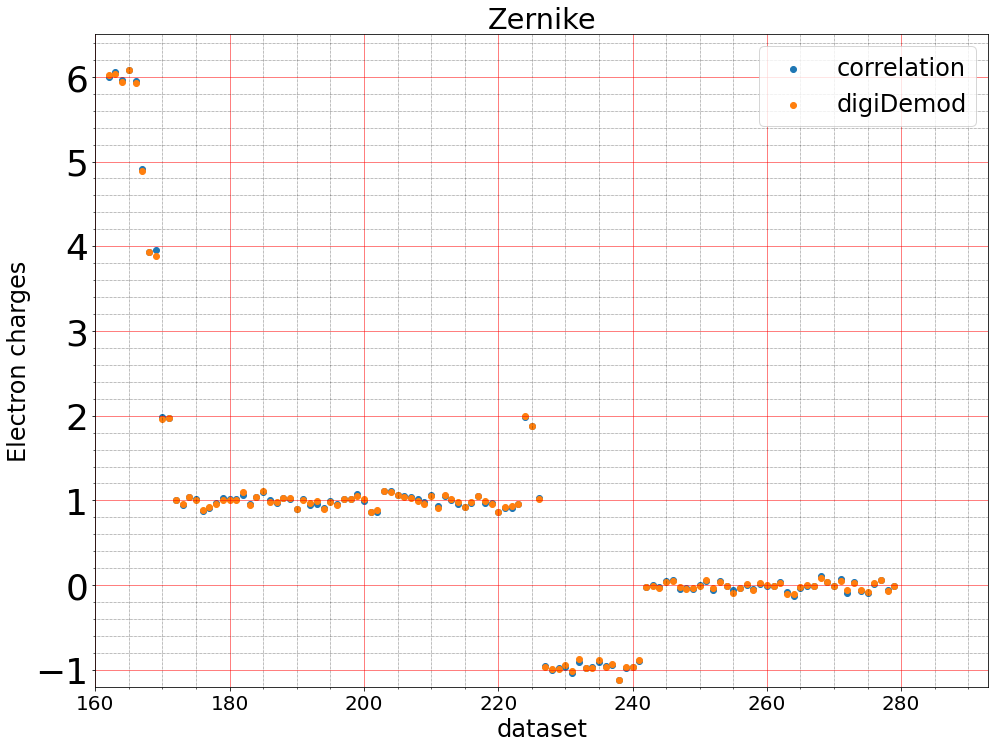

In [7]:
# amps = np.array(amps)
dischargeAmpArrZern = np.array(inPhaseZern)
dischargeAmpArr2Zern = -1*np.array(digiDemodZern)

_,ax = plt.subplots(figsize=(16,12))
# scale = 326.26

# Perrinf
plt.title("Zernike")
plt.scatter(range(len(dischargeAmpArrZern)), dischargeAmpArrZern/scaleXZern, label='correlation')
plt.scatter(range(len(dischargeAmpArr2Zern)), dischargeAmpArr2Zern/scaleX2Zern, label='digiDemod')

# ax.scatter(range(len(amps3)), amps3/scale, label='fit fixed-phases')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(160,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

## Now get the scale for all data and compare

100%|██████████| 110/110 [00:02<00:00, 43.09it/s]


110  files in folder
110  files loaded
Scale is  4.511295750076249e-05
voltage:  19.9924844030121
4.511295750076249e-05


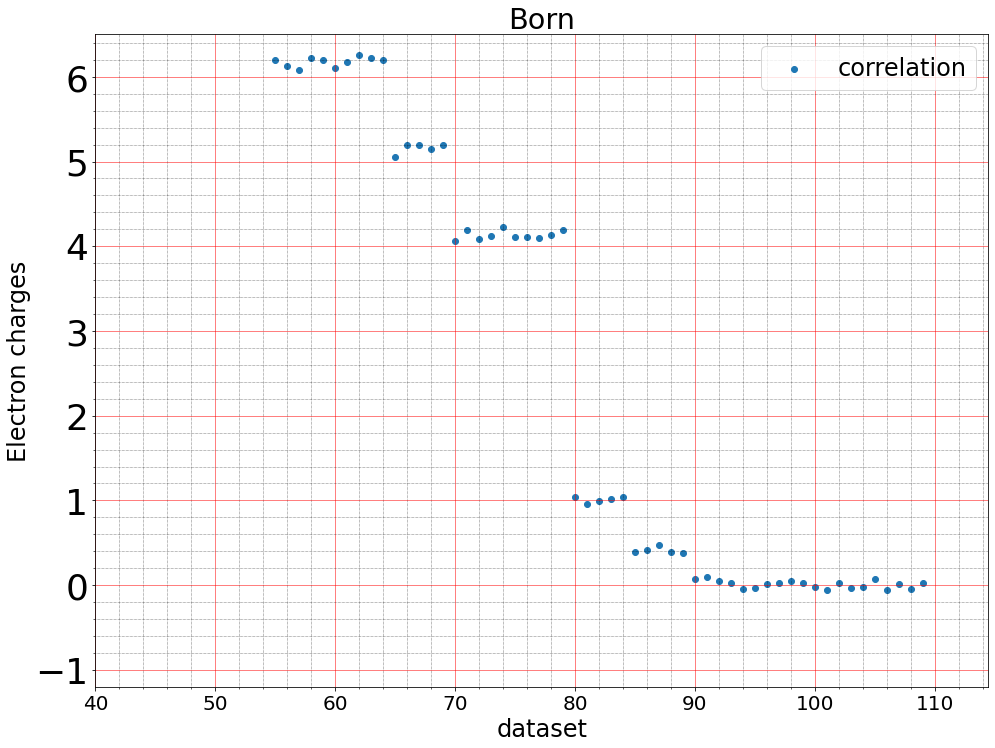

In [8]:
# load files for Born

stepCalDirBorn = r'/data/new_trap/20210819/Bead1/Discharge/FineDischarge/'
stepCalFilesBorn = load_dir(stepCalDirBorn, start_file=0)

# calculate inPhase component and get the scaling

corrsBorn = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in stepCalFilesBorn]
inPhaseBorn = [cc[0] for cc in corrsBorn]
digiDemodBorn =  [digital_demod(dat=files.x2,fDemod=71).imag for files in stepCalFilesBorn]

dischargeVoltageBorn = np.std(stepCalFilesBorn[-1].electrode_data[0])*np.sqrt(2)+np.std(stepCalFilesBorn[-1].electrode_data[1])*np.sqrt(2) 
dischargeAmpsBorn = inPhaseBorn
# select (manually) the charge and the respective files
charge=1 
scaleXBorn = np.abs(np.mean(dischargeAmpsBorn[80:84]))/charge # scales bits to charges

eta=0.6 # get from COMSOL 
scaleForceXBorn= np.abs(np.mean(dischargeAmpsBorn[80:84]))/(dischargeVoltageBorn*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleXBorn)
print("voltage: ", dischargeVoltageBorn)
print(scaleXBorn)

dischargeAmpArrBorn = np.array(inPhaseBorn)

_,ax = plt.subplots(figsize=(16,12))

# Perrinf
plt.title("Born")
plt.scatter(range(len(dischargeAmpArrBorn)), -1*dischargeAmpArrBorn/scaleXBorn, label='correlation')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(40,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

100%|██████████| 160/160 [00:03<00:00, 42.08it/s]


160  files in folder
160  files loaded
Scale is  1.918764543905865e-05
voltage:  19.99258857487542
1.918764543905865e-05


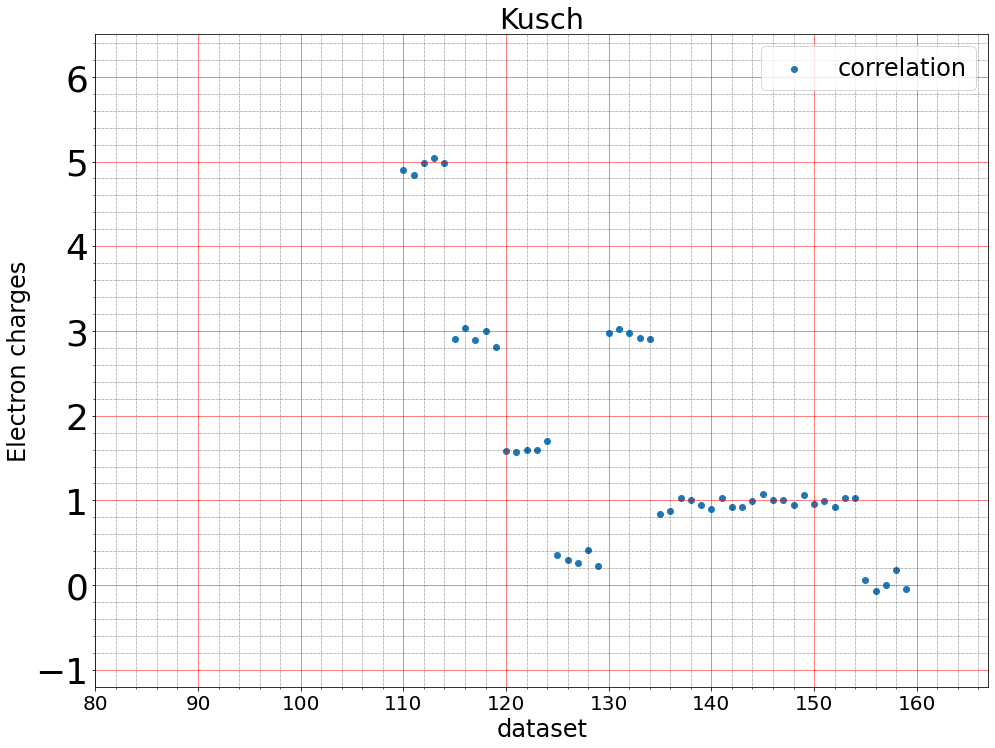

In [9]:
# load files for Kusch


# load discharge data for the respective bead


stepCalDirKusch = r'/data/new_trap/20210823/Bead2/Discharge/FineDischarge/'
stepCalFilesKusch = load_dir(stepCalDirKusch, start_file=0)

# calculate inPhase component and get the scaling

corrsKusch = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in stepCalFilesKusch]
inPhaseKusch = [cc[0] for cc in corrsKusch]
digiDemodKusch =  [digital_demod(dat=files.x2,fDemod=71).imag for files in stepCalFilesKusch]

dischargeVoltageKusch = np.std(stepCalFilesKusch[-1].electrode_data[0])*np.sqrt(2)+np.std(stepCalFilesKusch[-1].electrode_data[1])*np.sqrt(2) 
dischargeAmpsKusch = inPhaseKusch
# select (manually) the charge and the respective files
charge=1 
scaleXKusch = np.abs(np.mean(dischargeAmpsKusch[145:154]))/charge # scales bits to charges

eta=0.6 # get from COMSOL 
scaleForceXKusch= np.abs(np.mean(dischargeAmpsKusch[145:154]))/(dischargeVoltageKusch*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleXKusch)
print("voltage: ", dischargeVoltageKusch)
print(scaleXKusch)

dischargeAmpArrKusch = np.array(inPhaseKusch)

_,ax = plt.subplots(figsize=(16,12))

# Perrinf
plt.title("Kusch")
plt.scatter(range(len(dischargeAmpArrKusch)), -1*dischargeAmpArrKusch/scaleXKusch, label='correlation')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(80,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

100%|██████████| 185/185 [00:04<00:00, 38.85it/s]


185  files in folder
185  files loaded
Scale is  4.377858137823835e-05
voltage:  0.10005096655397289
4.377858137823835e-05


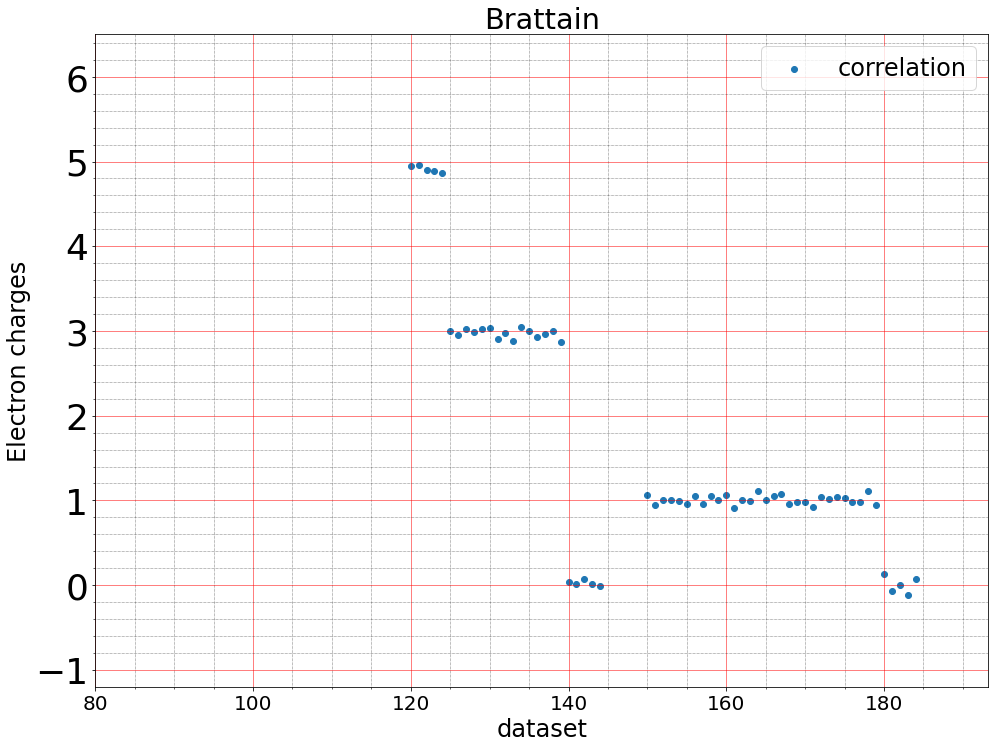

In [10]:
# load files for Brattain


# load discharge data for the respective bead


stepCalDirBrat = r'/data/new_trap/20210830/Bead1/Discharge/FineDischarge/'
stepCalFilesBrat = load_dir(stepCalDirBrat, start_file=0)

# calculate inPhase component and get the scaling

corrsBrat = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in stepCalFilesBrat]
inPhaseBrat = [cc[0] for cc in corrsBrat]
digiDemodBrat =  [digital_demod(dat=files.x2,fDemod=71).imag for files in stepCalFilesBrat]

dischargeVoltageBrat = np.std(stepCalFilesBrat[-1].electrode_data[0])*np.sqrt(2)+np.std(stepCalFilesBrat[-1].electrode_data[1])*np.sqrt(2) 
dischargeAmpsBrat = inPhaseBrat
# select (manually) the charge and the respective files
charge=1 
scaleXBrat = np.abs(np.mean(dischargeAmpsBrat[155:164]))/charge # scales bits to charges

eta=0.6 # get from COMSOL 
scaleForceXBrat= np.abs(np.mean(dischargeAmpsBrat[155:164]))/(dischargeVoltageBrat*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleXBrat)
print("voltage: ", dischargeVoltageBrat)
print(scaleXBrat)

dischargeAmpArrBrat = np.array(inPhaseBrat)

_,ax = plt.subplots(figsize=(16,12))

# Perrinf
plt.title("Brattain")
plt.scatter(range(len(dischargeAmpArrBrat)), dischargeAmpArrBrat/scaleXBrat, label='correlation')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(80,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

100%|██████████| 230/230 [00:05<00:00, 38.68it/s]


230  files in folder
230  files loaded
Scale is  2.5820571471046523e-05
voltage:  0.00023567375840588583
2.5820571471046523e-05


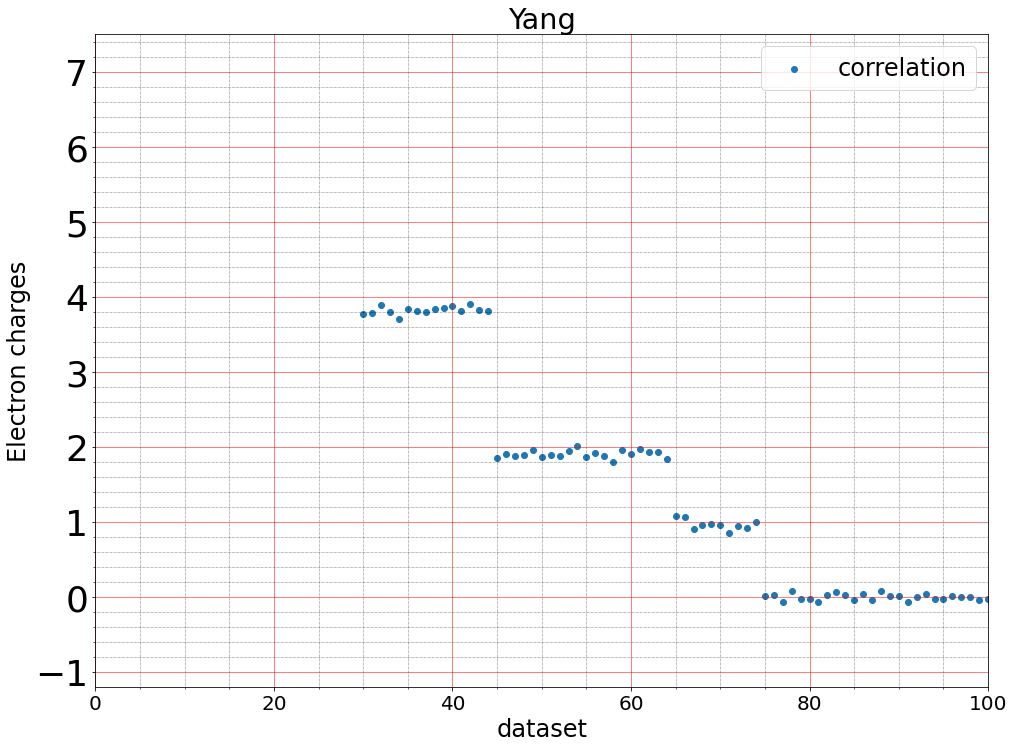

In [11]:
# load files for Yang


# load discharge data for the respective bead


stepCalDirYang = r'/data/new_trap/20210909/Bead1/Discharge/FineDischarge/'
stepCalFilesYang = load_dir(stepCalDirYang, start_file=0)


corrsYang = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in stepCalFilesYang]
inPhaseYang = [cc[0] for cc in corrsYang]
digiDemodYang =  [digital_demod(dat=files.x2,fDemod=71).imag for files in stepCalFilesYang]

dischargeVoltageYang = np.std(stepCalFilesYang[-1].electrode_data[0])*np.sqrt(2)+np.std(stepCalFilesYang[-1].electrode_data[1])*np.sqrt(2) 
voltagesYang =[]
for i in range(len(stepCalFilesYang)):
    voltagesYang.append(20*(np.std(stepCalFilesYang[i].electrode_data[0])*np.sqrt(2)+np.std(stepCalFilesYang[i].electrode_data[1])*np.sqrt(2))) 



dischargeAmpsYang = inPhaseYang
# select (manually) the charge and the respective files
charge=1 
scaleXYang = np.abs(np.mean(dischargeAmpsYang[65:69]))/charge # scales bits to charges

eta=0.6 # get from COMSOL 
scaleForceXYang= np.abs(np.mean(dischargeAmpsYang[65:69]))/(dischargeVoltageYang*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleXYang)
print("voltage: ", dischargeVoltageYang)
print(scaleXYang)

dischargeAmpArrYang = np.array(inPhaseYang)

_,ax = plt.subplots(figsize=(16,12))

# Perrinf
plt.title("Yang")
plt.scatter(range(len(dischargeAmpArrYang)), -1*dischargeAmpArrYang/(scaleXYang), label='correlation')
#plt.scatter(range(len(dischargeAmpArrYang)),voltagesYang)
ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,7.5), xlim=(0,100))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

Text(0, 0.5, 'Scale Factor [Bits/Charge]')

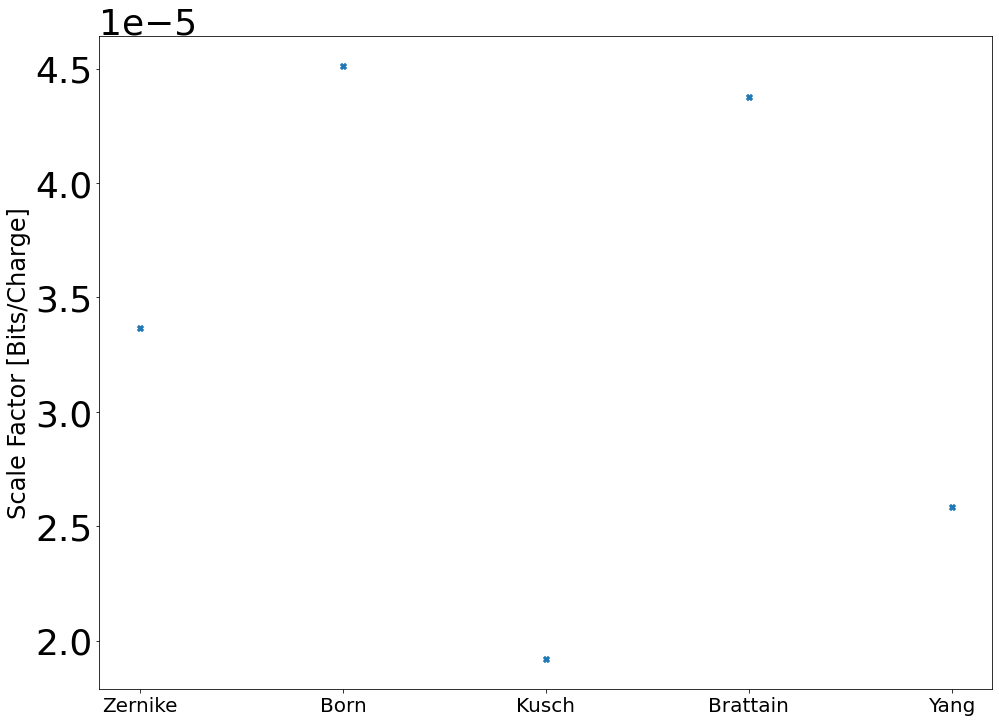

In [12]:
plt.scatter(["Zernike","Born","Kusch","Brattain","Yang"],[scaleXZern,scaleXBorn,scaleXKusch,scaleXBrat,scaleXYang],marker="X")
plt.ylabel("Scale Factor [Bits/Charge]")

## Analyze the existing single electrode data

### Zernike

In [13]:
imgFolderSingleElectrodeZern = r'/data/SC_data/ImageData/HeightData/20210622/20210624/run/'
imgFilesSingleElectrodeZern = load_npy_files(path=imgFolderSingleElectrodeZern+"i*.npy",print_list=False,max_files=1100)
timeFilesSingleElectrodeZern = np.load(imgFolderSingleElectrodeZern+"time_info.npy")

In [14]:
# x
respFolderSingleElectrodeXPZern = r'/data/new_trap/20210622/bead1/Single_electrode/X_electrode_plus_10V_71Hz/'
singleXPZernFiles = load_dir(respFolderSingleElectrodeXPZern, start_file=0)
respFolderSingleElectrodeXNZern = r'/data/new_trap/20210622/bead1/Single_electrode/X_electrode_minus_10V_71Hz/'
singleXNZernFiles = load_dir(respFolderSingleElectrodeXNZern, start_file=0)
# y 
respFolderSingleElectrodeYPZern = r'/data/new_trap/20210622/bead1/Single_electrode/Y_electrode_plus_10V_71hZ/'
singleYPZernFiles = load_dir(respFolderSingleElectrodeYPZern, start_file=0)
respFolderSingleElectrodeYNZern = r'/data/new_trap/20210622/bead1/Single_electrode/Y_electrode_minus_10V_71Hz/'
singleYNZernFiles = load_dir(respFolderSingleElectrodeYNZern, start_file=0)
# z
respFolderSingleElectrodeZPZern = r'/data/new_trap/20210622/bead1/Single_electrode/Z_electrode_plus_10V_71Hz/'
singleZPZernFiles = load_dir(respFolderSingleElectrodeZPZern, start_file=0)
respFolderSingleElectrodeZNZern = r'/data/new_trap/20210622/bead1/Single_electrode/Z_electrode_minus_10V_71Hz/'
singleZNZernFiles = load_dir(respFolderSingleElectrodeZNZern, start_file=0)

 15%|█▌        | 3/20 [00:00<00:00, 23.87it/s]

40  files in folder
40  files loaded


 15%|█▌        | 3/20 [00:00<00:00, 22.97it/s]

20  files in folder
20  files loaded


 20%|██        | 4/20 [00:00<00:00, 37.18it/s]

20  files in folder
20  files loaded


 20%|██        | 4/20 [00:00<00:00, 25.47it/s]

20  files in folder
20  files loaded


 20%|██        | 4/20 [00:00<00:00, 38.20it/s]

20  files in folder
20  files loaded


100%|██████████| 20/20 [00:00<00:00, 40.16it/s]

20  files in folder
20  files loaded


In [15]:
corrsSingleXPZern = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleXPZernFiles]
inPhaseSingleXPZern = [cc[0] for cc in corrsSingleXPZern]
corrsSingleXNZern = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleXNZernFiles]
inPhaseSingleXNZern = [cc[0] for cc in corrsSingleXNZern]
print("The ratio (P/N) in X is %f" % (np.mean(inPhaseSingleXPZern)/np.mean(inPhaseSingleXNZern)))
corrsSingleYPZern = [correlation(drive=sigIn, response=files.y2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleYPZernFiles]
inPhaseSingleYPZern = [cc[0] for cc in corrsSingleXPZern]
corrsSingleYNZern = [correlation(drive=sigIn, response=files.y2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleYNZernFiles]
inPhaseSingleYNZern = [cc[0] for cc in corrsSingleYNZern]
print("The ratio (P/N) in Y is %f" % (np.mean(inPhaseSingleYPZern)/np.mean(inPhaseSingleYNZern)))
corrsSingleZPZern = [correlation(drive=sigIn, response=files.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleZPZernFiles]
inPhaseSingleZPZern = [cc[0] for cc in corrsSingleZPZern]
corrsSingleZNZern = [correlation(drive=sigIn, response=files.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleZNZernFiles]
inPhaseSingleZNZern = [cc[0] for cc in corrsSingleZNZern]
print("The ratio (P/N) in Z is %f" % (np.mean(inPhaseSingleZPZern)/np.mean(inPhaseSingleZNZern)))

## checked the voltages, they are applied at 10V

The ratio (P/N) in X is 0.937032
The ratio (P/N) in Y is -0.797182
The ratio (P/N) in Z is 1.246256


In [16]:
# now get the height at the measurement
timeSingleZern = np.argmin(np.abs(singleXNZernFiles[0].time[0]/1e9-timeFilesSingleElectrodeZern))
timeDischargeZern = np.argmin(np.abs(stepCalFilesZern[190].time[0]/1e9-timeFilesSingleElectrodeZern))
imageSingleZern = imgFilesSingleElectrodeZern[timeSingleZern]
imageDischargeZern= imgFilesSingleElectrodeZern[timeDischargeZern]
print(" Shift in Pixel is %.2f" %phase_cross_correlation(threshold_image(imageDischargeZern,40,256),threshold_image(imageSingleZern,40,256),upsample_factor=1000)[0][0])


 Shift in Pixel is 0.75


# Born

In [17]:
imgFolderSingleElectrodeBorn = r'/data/SC_data/ImageData/HeightData/20210819/20210820/run1/'
imgFilesSingleElectrodeBorn = load_npy_files(path=imgFolderSingleElectrodeBorn+"i*.npy",print_list=False,max_files=10)
timeFilesSingleElectrodeBorn = np.load(imgFolderSingleElectrodeBorn+"time_info.npy")

In [18]:
# x
respFolderSingleElectrodeXPBorn = r'/data/new_trap/20210819/Bead1/Discharge/SingleResponse/Standard/plus_x/'
singleXPBornFiles = load_dir(respFolderSingleElectrodeXPBorn, start_file=0)
respFolderSingleElectrodeXNBorn = r'/data/new_trap/20210819/Bead1/Discharge/SingleResponse/Standard/minus_x/'
singleXNBornFiles = load_dir(respFolderSingleElectrodeXNBorn, start_file=0)
# y 
respFolderSingleElectrodeYPBorn = r'/data/new_trap/20210819/Bead1/Discharge/SingleResponse/Standard/plus_y/'
singleYPBornFiles = load_dir(respFolderSingleElectrodeYPBorn, start_file=0)
respFolderSingleElectrodeYNBorn = r'/data/new_trap/20210819/Bead1/Discharge/SingleResponse/Standard/minus_y/'
singleYNBornFiles = load_dir(respFolderSingleElectrodeYNBorn, start_file=0)
# z
respFolderSingleElectrodeZPBorn = r'/data/new_trap/20210819/Bead1/Discharge/SingleResponse/Standard/plus_z/'
singleZPBornFiles = load_dir(respFolderSingleElectrodeZPBorn, start_file=0)
respFolderSingleElectrodeZNBorn = r'/data/new_trap/20210819/Bead1/Discharge/SingleResponse/Standard/minus_z/'
singleZNBornFiles = load_dir(respFolderSingleElectrodeZNBorn, start_file=0)

 30%|███       | 3/10 [00:00<00:00, 27.42it/s]

10  files in folder
10  files loaded


 40%|████      | 4/10 [00:00<00:00, 33.55it/s]

10  files in folder
10  files loaded


 30%|███       | 3/10 [00:00<00:00, 28.00it/s]

10  files in folder
10  files loaded


 20%|██        | 2/10 [00:00<00:00, 19.39it/s]

10  files in folder
10  files loaded


 30%|███       | 3/10 [00:00<00:00, 29.71it/s]

10  files in folder
10  files loaded


100%|██████████| 10/10 [00:00<00:00, 35.85it/s]

10  files in folder
10  files loaded


In [19]:
corrsSingleXPBorn = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleXPBornFiles]
inPhaseSingleXPBorn = [cc[0] for cc in corrsSingleXPBorn]
corrsSingleXNBorn = [correlation(drive=sigIn, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleXNBornFiles]
inPhaseSingleXNBorn = [cc[0] for cc in corrsSingleXNBorn]
print("The ratio (P/N) in X is %f" % (np.mean(inPhaseSingleXPBorn)/np.mean(inPhaseSingleXNBorn)))
corrsSingleYPBorn = [correlation(drive=sigIn, response=files.y2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleYPBornFiles]
inPhaseSingleYPBorn = [cc[0] for cc in corrsSingleXPBorn]
corrsSingleYNBorn = [correlation(drive=sigIn, response=files.y2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleYNBornFiles]
inPhaseSingleYNBorn = [cc[0] for cc in corrsSingleYNBorn]
print("The ratio (P/N) in Y is %f" % (np.mean(inPhaseSingleYPBorn)/np.mean(inPhaseSingleYNBorn)))
corrsSingleZPBorn = [correlation(drive=sigIn, response=files.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleZPBornFiles]
inPhaseSingleZPBorn = [cc[0] for cc in corrsSingleZPBorn]
corrsSingleZNBorn = [correlation(drive=sigIn, response=files.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in singleZNBornFiles]
inPhaseSingleZNBorn = [cc[0] for cc in corrsSingleZNBorn]
print("The ratio (P/N) in Z is %f" % (np.mean(inPhaseSingleZPBorn)/np.mean(inPhaseSingleZNBorn)))

## checked the voltages, they are applied at 10V

The ratio (P/N) in X is 0.740009
The ratio (P/N) in Y is -0.708783
The ratio (P/N) in Z is 1.274153


In [20]:
# now get the height at the measurement
timeSingleBorn = np.argmin(np.abs(singleXNBornFiles[0].time[0]/1e9-timeFilesSingleElectrodeBorn))
timeDischargeBorn = np.argmin(np.abs(stepCalFilesBorn[80].time[0]/1e9-timeFilesSingleElectrodeBorn))
#imageSingleBorn = imgFilesSingleElectrodeBorn[timeSingleBorn]
imageDischargeBorn= imgFilesSingleElectrodeBorn[timeDischargeBorn]
#print(" Shift in Pixel is %.2f" %phase_cross_correlation(imageDischarge,imageSingle,upsample_factor=1000)[0][0])


### Kusch

In [21]:
imgFolderSingleElectrodeKusch = r'/data/SC_data/ImageData/HeightData/20210823/20210824/run/'
imgFilesSingleElectrodeKusch = load_npy_files(path=imgFolderSingleElectrodeKusch+"*.npy",print_list=False,max_files=200)
timeFilesSingleElectrodeKusch = np.load(imgFolderSingleElectrodeKusch+"time_info.npy")

In [22]:
# now get the height at the measurement
timeDischargeKusch = np.argmin(np.abs(stepCalFilesKusch[150].time[0]/1e9-timeFilesSingleElectrodeKusch))
#imageSingleKusch = imgFilesSingleElectrodeKusch[timeSingleKusch]
imageDischargeKusch= imgFilesSingleElectrodeKusch[timeDischargeKusch]
#print(" Shift in Pixel is %.2f" %phase_cross_correlation(imageDischarge,imageSingle,upsample_factor=1000)[0][0])


In [23]:
# difference between Kusch and Born
phase_cross_correlation(threshold_image(imageDischargeKusch,50,256),threshold_image(imageDischargeBorn,50,256),upsample_factor=10)

(array([-10.2,   1.7]), 0.5024723601049453, 3.111268841420329e-05)

### Brattain

In [24]:
imgFolderSingleElectrodeBrat = r'/data/SC_data/ImageData/HeightData/20210830/20210830/run1/'
imgFilesSingleElectrodeBrat = load_npy_files(path=imgFolderSingleElectrodeBrat+"i*.npy",print_list=False,max_files=100)
timeFilesSingleElectrodeBrat = np.load(imgFolderSingleElectrodeBrat+"time_info.npy")

In [25]:
# now get the height at the measurement
timeDischargeBrat = np.argmin(np.abs(stepCalFilesBrat[155].time[0]/1e9-timeFilesSingleElectrodeBrat))
imageDischargeBrat= imgFilesSingleElectrodeBrat[timeDischargeBrat]


In [26]:
# difference between Brattain and Born
phase_cross_correlation(threshold_image(imageDischargeBrat,50,256),threshold_image(imageDischargeBorn,50,256),upsample_factor=10)

(array([-11.2,   1.3]), 0.43389911141246945, -1.778011086384015e-05)

### Yang

In [27]:
imgFolderSingleElectrodeYang = r'/data/SC_data/ImageData/HeightData/20210909/run1/'
imgFilesSingleElectrodeYang = load_npy_files(path=imgFolderSingleElectrodeYang+"i*.npy",print_list=False,max_files=200)
timeFilesSingleElectrodeYang = np.load(imgFolderSingleElectrodeYang+"time_info.npy")

In [28]:
# now get the height at the measurement
timeDischargeYang = np.argmin(np.abs(stepCalFilesYang[65].time[0]/1e9-timeFilesSingleElectrodeYang))
imageDischargeYang= imgFilesSingleElectrodeYang[timeDischargeYang]


In [29]:
phase_cross_correlation(threshold_image(imageDischargeYang,50,256),threshold_image(imageDischargeBorn,50,256),upsample_factor=10)

(array([-12.8,   0.8]), 0.4580786705159249, 1.390466598958334e-05)

### Check data

In [13]:
def hist_plots_for_comparison(df,beadName,voltageVal,rangeVal=None):
    
    if(rangeVal==None):
        minFR = min(np.std(df.F1),np.std(df.F2))
        maxFR = max(np.std(df.F1),np.std(df.F2))
        rangeVal = (-5*minFR,5*maxFR)
        
    a = plt.hist(df["F1"],bins=100,color="red",alpha=0.25,range=rangeVal,label="F1")
    b = plt.hist(df["F2"],bins=100,color="black",alpha=0.25,range=rangeVal,label="F2")
    plt.legend()
    plt.xlabel(r"$\epsilon$")
    plt.title("1f %s at %s V" %(beadName,voltageVal))
    plt.text(np.min(a[1]),np.max(a[0]), "F1: %.2e +- %.2e" %(np.mean(df["F1"]),np.std(df["F1"])/np.sqrt(len(df))))
    plt.text(np.min(a[1]),np.max(a[0])/1.05, "F2: %.2e +- %.2e" %(np.mean(df["F2"]),np.std(df["F2"])/np.sqrt(len(df))))

    plt.show()
    
    
    if(rangeVal==None):
        minGR = min(np.std(df.G1),np.std(df.G2))
        maxGR = max(np.std(df.G1),np.std(df.G2))
        rangeVal = (-5*minGR,5*maxGR)

    c = plt.hist(df["G1"],bins=100,color="green",alpha=0.25,range=rangeVal,label="G1")
    d = plt.hist(df["G2"],bins=100,color="blue",alpha=0.25,range=rangeVal,label="G2")
    plt.legend()
    plt.xlabel(r"$\epsilon$")
    plt.title("2f %s at %s V" %(beadName,voltageVal ))
    plt.text(np.min(c[1]),np.max(c[0])/1, "G1: %.2e +- %.2e" %(np.mean(df["G1"]),np.std(df["G1"])/np.sqrt(len(df))))
    plt.text(np.min(c[1]),np.max(c[0])/1.05, "G2: %.2e +- %.2e" %(np.mean(df["G2"]),np.std(df["G2"])/np.sqrt(len(df))))
    plt.show()
    
    
    return 

In [15]:
# Best Zernicke

dataDir = r'/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_2/'
noFiles = len(os.listdir(dataDir))
dfDDZern,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="y",gap=2,ElectrodeRatio=0.79,scaleFactor=scaleYZern,method="DigiDemod")
dfSFZern,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=18300,axis="y",gap=2,ElectrodeRatio=0.79,scaleFactor=scaleYZern,method="SineFit")

100%|██████████| 18300/18300 [02:02<00:00, 149.39it/s]


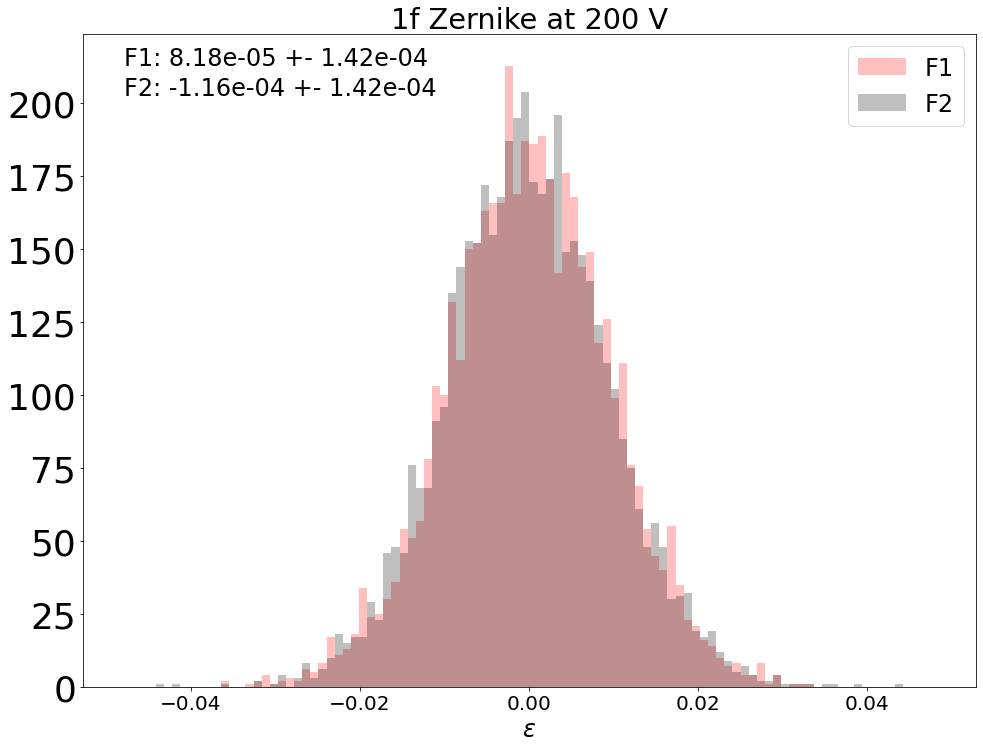

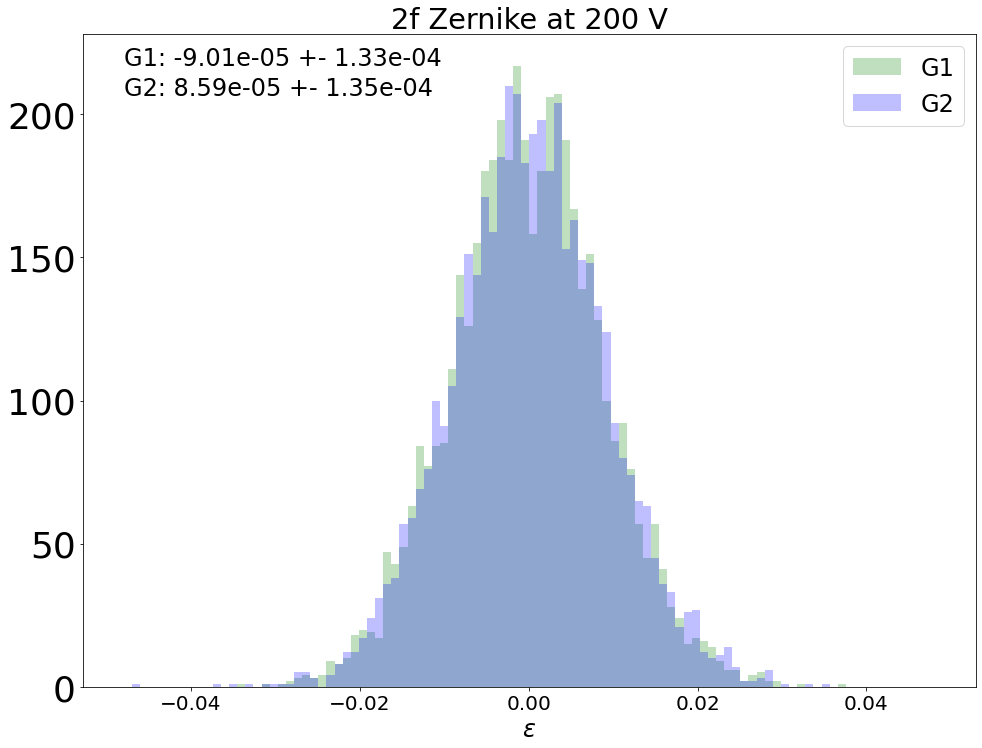

In [16]:
hist_plots_for_comparison(df=dfDDZern,beadName="Zernike",voltageVal=200,rangeVal=None)

## Brattain

In [32]:
dataDir = r'/data/new_trap/20210830/Bead1/Neutrality/0V_100V_YZspin_29p62kHz_20210830/'
noFiles = len(os.listdir(dataDir))
dfDDBorn0V_lowspin,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="DigiDemod")
dfSFBorn0V_lowspin,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="SineFit")

100%|██████████| 996/996 [00:03<00:00, 258.13it/s]


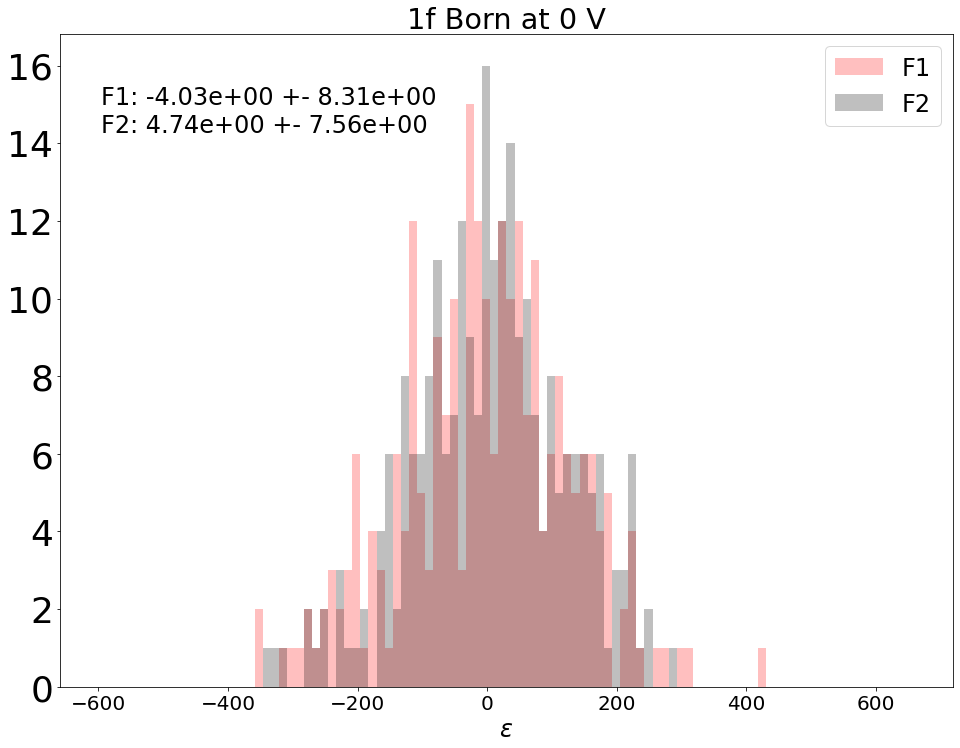

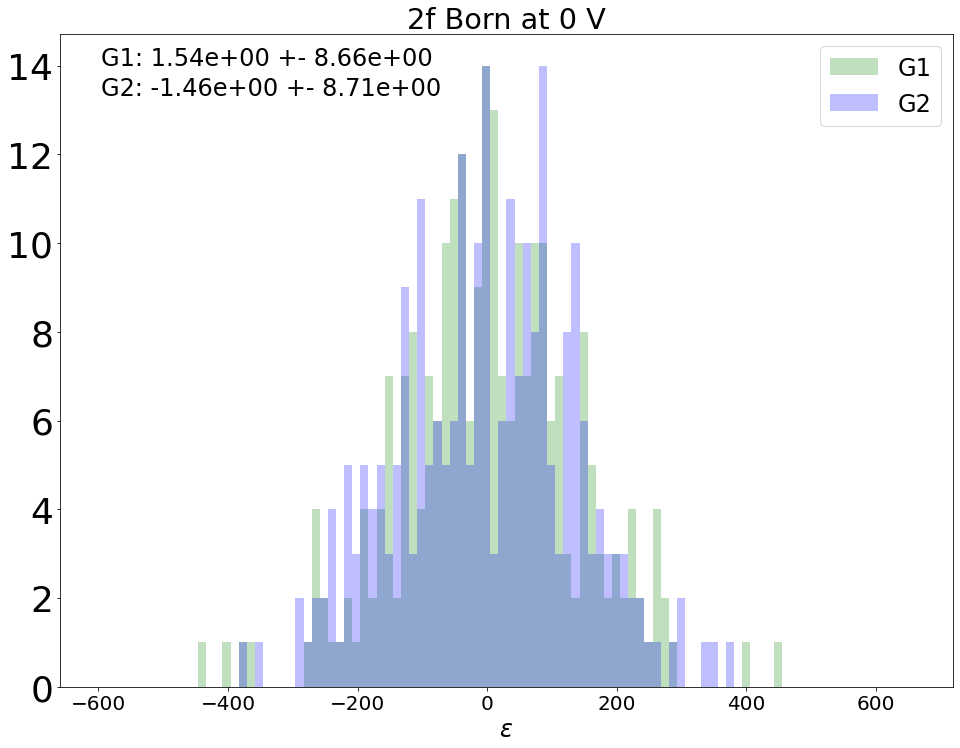

In [33]:
hist_plots_for_comparison(df=dfDDBorn0V_lowspin,beadName="Born",voltageVal=0,rangeVal=None)


In [20]:
dataDir = r'/data/new_trap/20210830/Bead1/Neutrality/20V_100V_YZspin_29p62kHz_20210831/'
noFiles = len(os.listdir(dataDir))
dfDDBorn20V_lowspin,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="DigiDemod")


100%|██████████| 7972/7972 [01:49<00:00, 72.79it/s] 


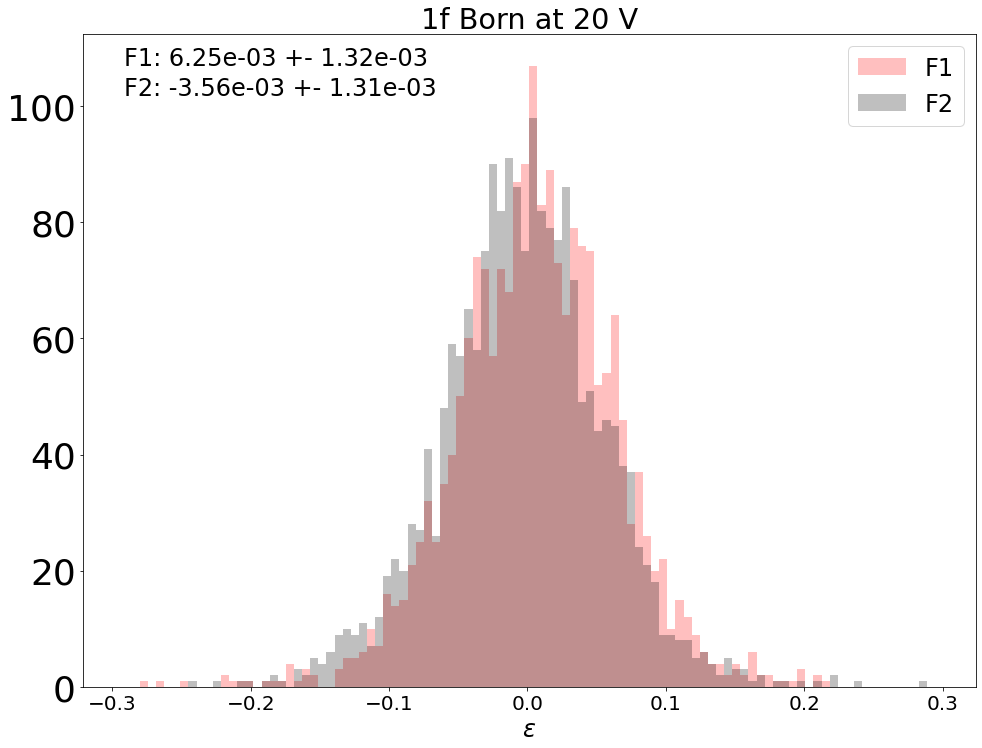

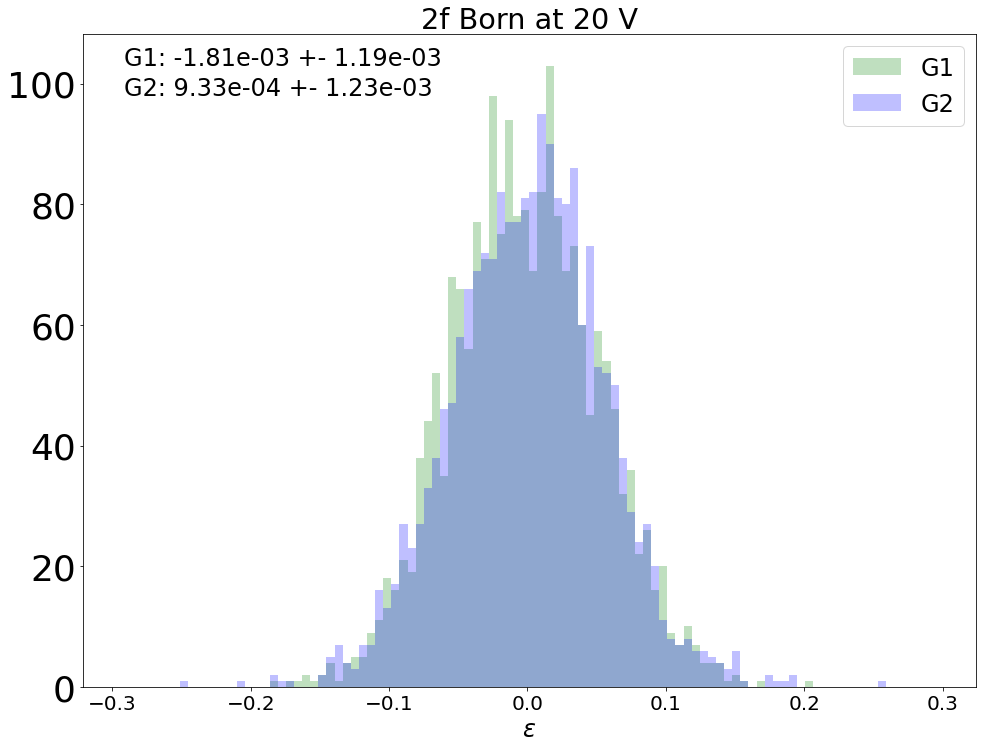

In [21]:
hist_plots_for_comparison(df=dfDDBorn20V_lowspin,beadName="Born",voltageVal=20,rangeVal=None)


In [22]:
dataDir = r'/data/new_trap/20210830/Bead1/Neutrality/20V_100V_YZspin_98p98kHz_20210901/'
noFiles = len(os.listdir(dataDir))
dfDDBorn20V_highspin1,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="DigiDemod")


100%|██████████| 7600/7600 [01:20<00:00, 94.63it/s] 


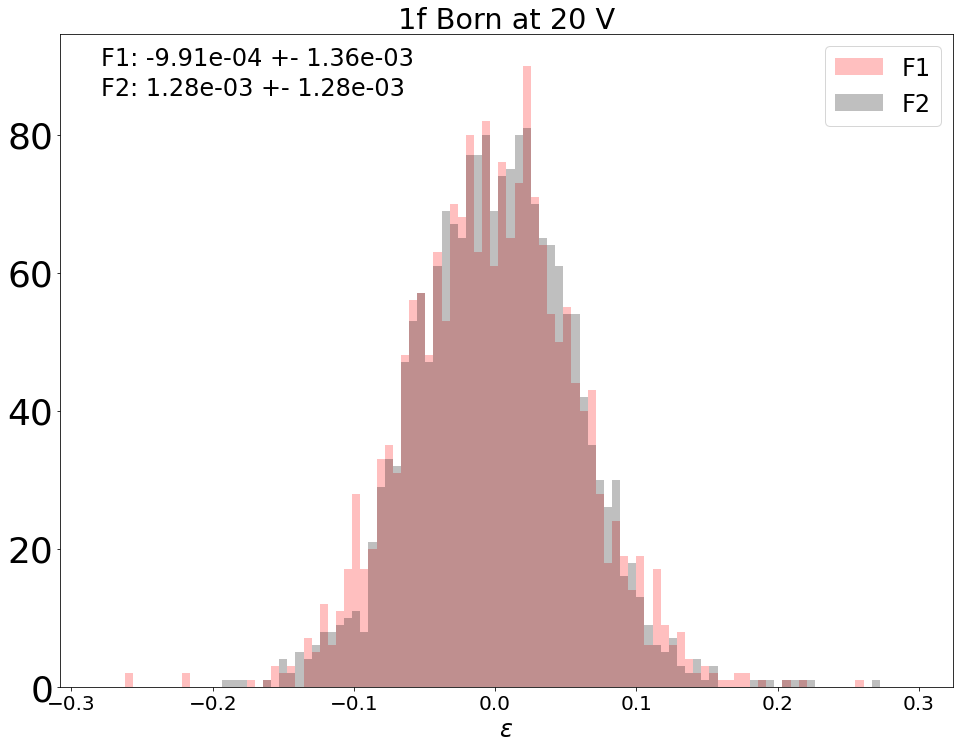

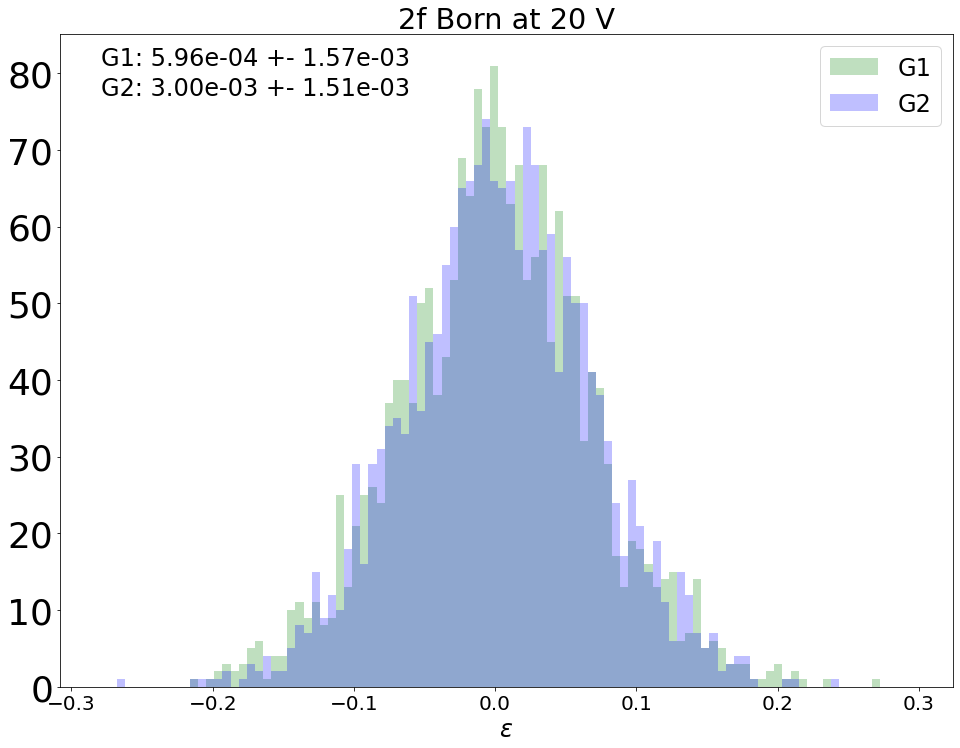

In [23]:
hist_plots_for_comparison(df=dfDDBorn20V_highspin1,beadName="Born",voltageVal=20,rangeVal=None)


In [24]:
dataDir = r'/data/new_trap/20210830/Bead1/Neutrality/20V_100V_YZspin_98p98kHz_20210903/'
noFiles = len(os.listdir(dataDir))
dfDDBorn20V_highspin2,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="DigiDemod")


100%|██████████| 1380/1380 [00:13<00:00, 103.92it/s]


In [25]:
dataDir = r'/data/new_trap/20210830/Bead1/Neutrality/20V_100V_YZspin_98p98kHz_20210904/'
noFiles = len(os.listdir(dataDir))
dfDDBorn20V_highspin3,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="DigiDemod")


100%|██████████| 7220/7220 [01:23<00:00, 86.32it/s] 


In [26]:
dataDir = r'/data/new_trap/20210830/Bead1/Neutrality/20V_100V_YZspin_98p98kHz_20210905/'
noFiles = len(os.listdir(dataDir))
dfDDBorn20V_highspin4,tV = compare_millicharge_full_analysis_perFile(folder=dataDir,fileNo=(noFiles - (noFiles % 4)),axis="x",gap=2,ElectrodeRatio=0.75,scaleFactor=scaleYZern,method="DigiDemod")


100%|██████████| 3700/3700 [00:39<00:00, 93.13it/s] 


In [28]:
dfDDBorn20V_highspin = pd.concat([dfDDBorn20V_highspin1,dfDDBorn20V_highspin2,dfDDBorn20V_highspin3,dfDDBorn20V_highspin4])

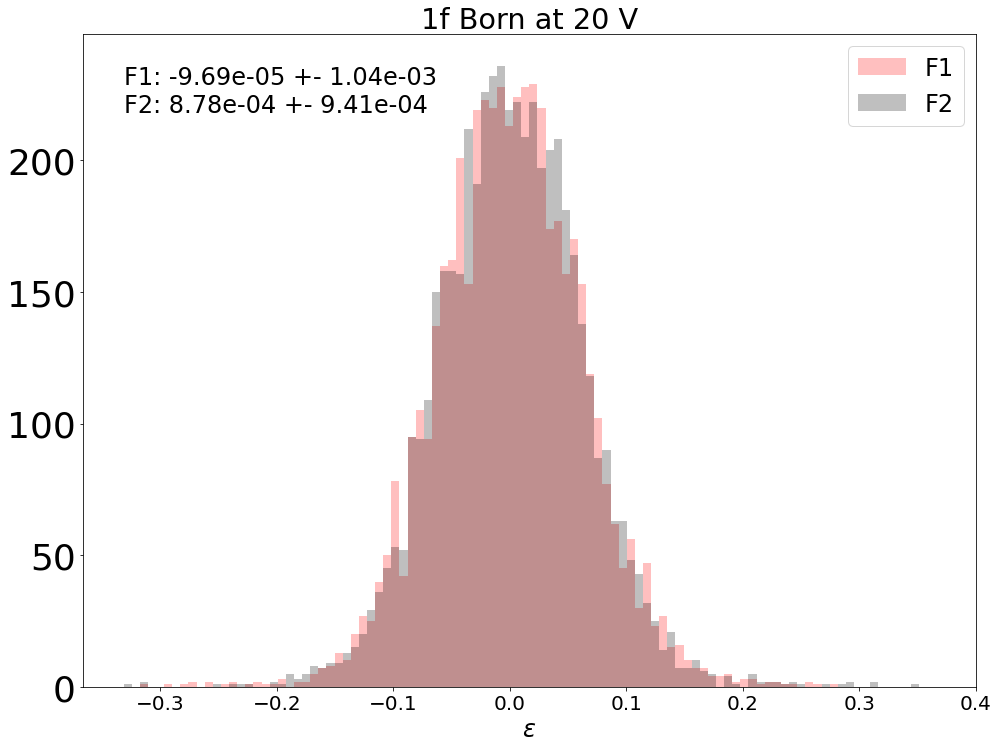

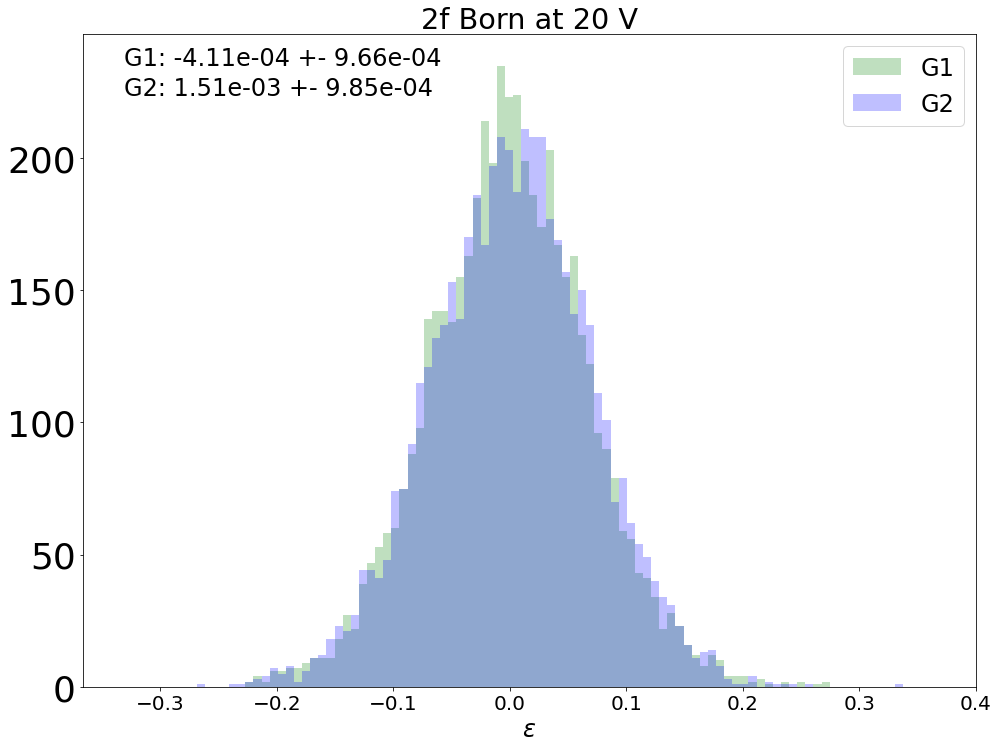

In [31]:
hist_plots_for_comparison(df=dfDDBorn20V_highspin,beadName="Born",voltageVal=20,rangeVal=None)
